# Practical Deep Learning for Coders Course - Lesson 4

> "This blog-post series captures my weekly notes while I attend the [fastaiv5 course conducted by University of Queensland with fast.ai](https://itee.uq.edu.au/event/2022/practical-deep-learning-coders-uq-fastai). So off to week 4, where we will get started with NLP and transformers"

- toc: true
- branch: master
- badges: true
- hide_binder_badge: true
- hide_deepnote_badge: true
- comments: true
- author: Kurian Benoy
- categories: [fastai, fastbook]                                                         
- hide: false
- search_exclude: false

## Introduction to lesson

Almost 100+ people watched live virtually and lesson were held live in front of a bunch of audience in University of Queensland. `Prof. John Williams` opened session by telling about filling a separate form, for people interested in attending the hackathon organized end of the course.

During the start `Jeremy` mentioned he would love folks to organize a online hackathon by community for folks attending remotely as well. Yet right now Jeremy and John doesn't have the capacity to organize one.

> Todays lesson is something a lot of regulars of fast.ai course are excited about as it covers really new material on transformers.

## Why using a different framework - Transformers

Since this course is fastai, it may feel a bit weird when we are today going to use a different library
called `transformers`.

> Important: As practitioners, it's important for us to learn more than one framework.


> Note: Differences with fastai and transformers:

1. `Transformers` provide lot of state of art models, and the `Tokenizers` library build with Rust is really good at the moment.

2. It's good to get exposure to a library which is not so layered like `fast.ai`, which is reason that makes it super useful for beginners.


## ULMFiT architecture


The idea of fine-tuning a pre-trained NLP model in this way was pioneered by an algorithm called [Universal Language Model Fine-tuning for Text Classification aka ULMFiT](https://arxiv.org/abs/1801.06146) which was first presented actually in a fastai course.

### **What's a pretrained model and what is finetuning?**

Consider finetuning, as tweaking functions in such a way when if you are already some values of a, b lever are good and optimal for a particular function. Then tweaking value of c is easier right?

> Important: A pre-trained model is a bunch of parameters that have already been fitted, where some of them we’re already pretty confident of what they should be, and some of them we really have no idea at all. And so fine-tuning is the process of taking those ones we have no idea what they should be at all, and trying to get them right, and then moving the other ones a little bit.


### Steps in ULMFiT

**ULMFiT archtecture consits of three steps:**


- Training a language models with general dataset like wikipedia. So it gets so good in predicting next words. Now in `transformers` one big difference compared to `ULMFiT` is we use masking instead of predicting next word
- IMDB lnagage build a language model, build on top of LM for wikipedia
- In three step, is where model classifier comes and based on this label sentences as postive, negative etc.

## Fundamental libraries in ML

Four fundamental libraries you always need in datascience are:

1. NumPy
2. Pandas
3. matplotlib
4. Pytorch

> Important: It looks pretty cool, if you build the state of art stuff. Yet if you don't know fundamentals, you will encounter trouble. So i will recommend you to get started by first complete reading the [Deep Learning for Coders book](https://github.com/fastai/fastbook), then the Macinskey book on Python for Data Analysis, 3E which is free [completely online](https://wesmckinney.com/book/).



## NLP notebook tokenization

[Getting started with NLP for absolute beginners](https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners)

It's been only a year or two since NLP has been getting good results, for computer vision things
are being optimistic for a long time now.

- Tokenization, is converting the text blurbs into a set of small tokens.
- Numericalization is the process of converting these tokens to numbers for models to train

We used `deberta-v3` as base model as some models are always found to give good results. Yet there are lot of pretrained models available in public which can just found by searching like Patent for patent models in [Huggingface models hub](https://huggingface.co/models).


> Note: (Jeremy) For under 2000 words use transformers approach, for more than 2000 words per sequence it would a good idea to try ULMFiT also along with transformers.


## Test, Validation, Training Dataset

The most important concept in ML is creating:

1. Test set
2. Validation set
3. Training set

> Important: (Jeremy) Kaggle competitions are really a good way to create a good validation set... Beginners generally tend to overfit ... In real world outside of kaggle you often won't know it's overfit. You just destroy value for organizations silently... You really don't get it untill you screw it up a few times.

[How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)

`Test Set` is a separate data which is not used by ML model for learning. It's kept as separate hold out dataset for further testing.

## Understanding metrics

With the validation set, we are measuring some metrics like accuracy which tell how good our ML model is. In Kaggle for every competition there is a metric available to optimize based on.

### Why metrics is different from loss?

> Important: (Jeremy) If you were taking something like accuracy as loss function for classifying cats vs dogs. Then it may go on finding gradient and optimizing, yet at some point if inacurate cats are still labelled as dogs by models. Evaluating with accuracy as loss functions will be same. We can't proceed further with such a loss function, that's why we use functions like MSE for loss usually.

Metrics in real world is ofcourse a big issue, so with one ML model which claims to have got good results in a particular metrics when implemented has caused issues in real world which affect lot of people.

So check the article written by Rachael Thomas on [The problem with metrics is a big problem for AI](https://www.fast.ai/2019/09/24/metrics/).

## Pearson Coefficient

Understanding metrics is very key, especially in Kaggle competitons. According to this Kaggle competition page: "Submissions are evaluated on the Pearson correlation coefficient between the predicted and actual similarity scores."

> Note: "This coefficient is usually abbreviated using the single letter r. It is the most widely used measure of the degree of relationship between two variables. r can vary between -1, which means perfect inverse correlation, and +1, which means perfect positive correlation. "

[source: Kaggle Notebook]((https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners)

Jeremy's way of teaching this concept was explaining with code for us to get intuition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True)
df = df["data"].join(df["target"]).sample(1000, random_state=52)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7506,3.0550,37.0,5.152778,1.048611,729.0,5.062500,33.92,-118.28,1.054
4720,3.0862,35.0,4.697897,1.055449,1159.0,2.216061,34.05,-118.37,3.453
12888,2.5556,24.0,4.864905,1.129222,1631.0,2.395007,38.66,-121.35,1.057
13344,3.0057,32.0,4.212687,0.936567,1378.0,5.141791,34.05,-117.64,0.969
7173,1.9083,42.0,3.888554,1.039157,1535.0,4.623494,34.05,-118.19,1.192


In [2]:
np.set_printoptions(precision=2, suppress=True)

# to get correlation coefficent between every row of matrix with every other matrix
np.corrcoef(df, rowvar=False)

array([[ 1.  , -0.12,  0.43, -0.08,  0.01, -0.07, -0.12,  0.04,  0.68],
       [-0.12,  1.  , -0.17, -0.06, -0.31,  0.  ,  0.03, -0.13,  0.12],
       [ 0.43, -0.17,  1.  ,  0.76, -0.09, -0.07,  0.12, -0.03,  0.21],
       [-0.08, -0.06,  0.76,  1.  , -0.08, -0.07,  0.09,  0.  , -0.04],
       [ 0.01, -0.31, -0.09, -0.08,  1.  ,  0.16, -0.15,  0.13,  0.  ],
       [-0.07,  0.  , -0.07, -0.07,  0.16,  1.  , -0.16,  0.17, -0.27],
       [-0.12,  0.03,  0.12,  0.09, -0.15, -0.16,  1.  , -0.93, -0.16],
       [ 0.04, -0.13, -0.03,  0.  ,  0.13,  0.17, -0.93,  1.  , -0.03],
       [ 0.68,  0.12,  0.21, -0.04,  0.  , -0.27, -0.16, -0.03,  1.  ]])

In [5]:
def relation_matrix(x, y):
    return np.corrcoef(x, y)[0][1]

In [6]:
np.corrcoef(df.HouseAge, df.MedHouseVal)

array([[1.  , 0.12],
       [0.12, 1.  ]])

In [7]:
relation_matrix(df.HouseAge, df.MedHouseVal)

0.1165853555067797

When I ran through this code I was thinking about how [0,1] element in this corelation matrix is 0.12, when value of relation_matrix returns something as 0.11658535. I asked this simple doubt in the forum and after a while, I got answer from one of the [course TAs Nick(n-e-w)](https://forums.fast.ai/u/n-e-w/summary).

![image](https://user-images.githubusercontent.com/24592806/169845219-4915b78d-8be4-4972-bd37-40476d1b6f4c.png)

> Note: This is one of the best things IMO about taking the course live, rather than attending online. There is lot more activity, and you even get some of your questions answered by lot of experts and even Jeremy too.

In [7]:
def show_corr(df, a, b):
    x, y = df[a], df[b]
    plt.scatter(x, y, alpha=0.5, s=4)
    plt.title(f"{a} vs {b}; r: {relation_matrix(x, y):.2f}")

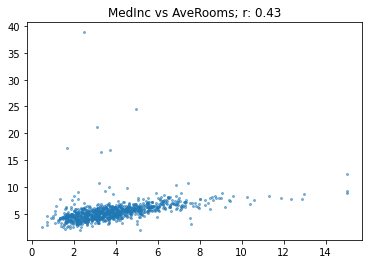

In [9]:
show_corr(df, "MedInc", "AveRooms")

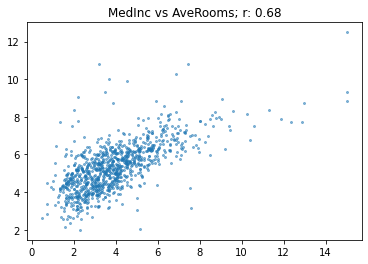

In [10]:
show_corr(df[df.AveRooms < 15], "MedInc", "AveRooms")

If you look at two graphs, once we removed the Average room <15. We notice a huge difference in r value which denotes the `pearson coefficent` are sensitive to outliers. Thus we got an intutive feeling of what the metrics is doing, and how it's being affected by outliers. Even if you make small error in some of predictions you will notice a hugh bump in leaderboard which affects your position, as pearson correlation penalizes heavily for wrong predictions.

Next week, will be the fifth lesson and the last one for month of May. The course will resume again after a three weeks breaks during month of June when monsoon season delights us here in Kerala with rain and everyone else with more fastai.